Uses an ARIMA model to predict the closing stock price of NVIDA.

In [4]:
#Import libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
df = web.DataReader('NVDA', data_source = 'yahoo', start = date.today() + relativedelta(years = -5), end = date.today())
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-19,49.500000,48.112499,48.610001,49.450001,57077200.0,48.929611
2017-10-20,49.897499,49.134998,49.622501,49.224998,45162000.0,48.706970
2017-10-23,49.712502,48.950001,49.445000,49.154999,42869600.0,48.637714
2017-10-24,49.687500,48.985001,49.247501,49.669998,40724400.0,49.147293
2017-10-25,49.805000,47.792500,49.270000,48.415001,82816000.0,47.905499
...,...,...,...,...,...,...
2022-10-13,120.779999,108.129997,109.709999,119.599998,85010300.0,119.599998
2022-10-14,121.110001,112.040001,120.570000,112.269997,71255100.0,112.269997
2022-10-17,119.480003,115.169998,115.180000,118.879997,58077400.0,118.879997


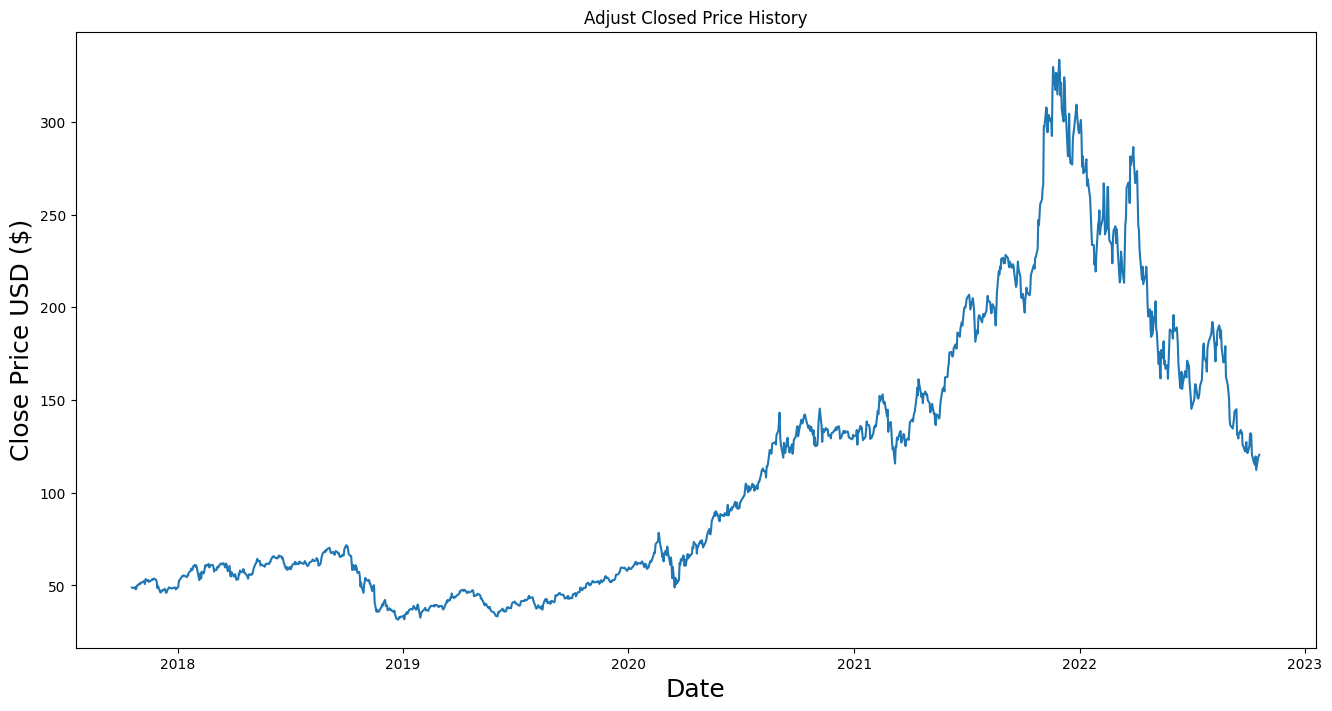

In [9]:
#Visualise the adjusted close history
plt.figure(figsize = (16,8))
plt.title('Adjust Closed Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [10]:
#Create a new dataframe with only the 'Adj Close' column
data = df.filter(['Adj Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on (80/20 Training/Test split)
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1008

In [11]:
#Create the training dataset
train_data = data[0:training_data_len]
test_data = data[training_data_len:]

In [12]:
model_predictions = []
testing_data_len = len(test_data)